<a href="https://colab.research.google.com/github/cseaboys/dl/blob/main/e4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [69]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [70]:
x = np.linspace(1, 100, 1000)
y = np.sin(x)

seq_len = 20
def create_dataset(series, seq_len):
    X, Y = [], []
    for i in range(len(series) - seq_len):
        X.append(series[i:i+seq_len])
        Y.append(series[i+seq_len])
    return np.array(X), np.array(Y)

X, Y = create_dataset(y, seq_len)

In [71]:
X = X[..., np.newaxis]
Y = Y[..., np.newaxis]

split = int(len(X) * 0.8)
X_train, X_test = X[:split], X[split:]
Y_train, Y_test = Y[:split], Y[split:]

In [72]:
model = keras.Sequential([
    keras.Input(shape=(seq_len, 1)),
    keras.layers.SimpleRNN(32, activation='tanh'),
    keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mse')


In [73]:
model.fit(X_train, Y_train, epochs=20, batch_size=32)

Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.2755
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0121
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0030
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0011
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4.0623e-04
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.0226e-04
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.7560e-04
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.7377e-04
Epoch 9/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.4719e-04
Epoch 10/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.4850e-04
Epoch 11/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.2008e-04
Epoch 12/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.1335e-04
Epoch 13/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 9.9579e-05
Epoch 14/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 9.1689e-05
Epoch 15/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5m

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step


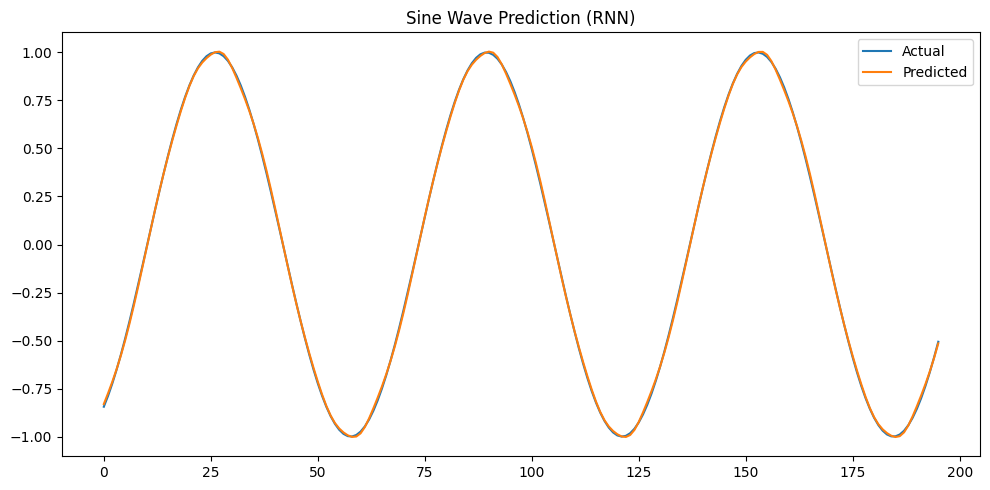

Actual: -0.8446  Predicted: -0.8306
Actual: -0.7874  Predicted: -0.7740
Actual: -0.7226  Predicted: -0.7137
Actual: -0.6506  Predicted: -0.6483
Actual: -0.5723  Predicted: -0.5765


In [74]:
pred = model.predict(X_test)

fig, ax = plt.subplots(1, 1, figsize=(10, 5))

ax.plot(range(len(Y_test)), Y_test.flatten(), label='Actual')

ax.plot(range(len(pred)), pred.flatten(), label='Predicted')

ax.legend()
ax.set_title("Sine Wave Prediction (RNN)")

plt.tight_layout()
plt.show()

for i in range(5):
    print(f"Actual: {Y_test[i,0]:.4f}  Predicted: {pred[i,0]:.4f}")